In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/Hourly_Weather_Dataset.csv")

In [47]:
data.shape

(40711, 14)

In [48]:
data.head()

,date,time,Severity,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,forest_fire
0,1/1/20,7:00:00,0.0,6.061,67.824059,0.0,933.246216,20.400002,6.638072,6.061,8.061001,0.364,0.372,N
1,1/1/20,8:00:00,0.0,5.011,72.945190,0.0,932.384216,22.800001,5.014219,5.711,7.911000,0.364,0.372,N
2,1/1/20,9:00:00,0.0,3.861,77.639603,0.0,931.856018,26.700001,4.693825,5.311,7.761000,0.364,0.372,N
3,1/1/20,10:00:00,0.0,4.861,70.835876,0.0,932.522095,7.800000,6.130579,5.161,7.611000,0.364,0.372,N
4,1/1/20,11:00:00,0.0,5.161,67.877151,0.0,932.611816,32.100002,3.960000,4.811,7.461000,0.364,0.372,N


In [49]:
# datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# filter rows to when fire happened
fire_weather_data = data[data['forest_fire'] == 'Y']

# Select the relevant weather variables
fire_weather_summary = fire_weather_data[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'surface_pressure', 
                                          'cloud_cover', 'wind_speed_10m', 'soil_temperature_0_to_7cm', 
                                          'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm', 
                                          'soil_moisture_7_to_28cm']].describe()

fire_weather_summary

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9360\1023782254.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
count,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000,6422.000000
mean,25.996273,34.224443,0.000903,949.672409,8.362473,10.069481,27.822044,27.344412,0.145445,0.176606
std,7.913216,24.082342,0.058899,28.432783,14.618566,4.914597,8.105363,5.848311,0.058268,0.065136
min,1.674000,5.358259,0.000000,877.011100,0.000000,0.360000,2.331000,5.473500,0.066000,0.126000
25%,20.220500,17.009457,0.000000,929.109423,0.000000,5.692099,23.003000,24.805125,0.125000,0.149000
50%,27.153250,23.622296,0.000000,946.519400,0.900000,10.009036,28.786750,28.067751,0.133000,0.152000
75%,31.646000,46.048367,0.000000,966.229570,12.599999,14.039999,32.641251,31.519000,0.137000,0.157000
max,42.581500,100.000000,4.700000,1019.041750,100.000000,24.480000,44.717000,35.836500,0.503000,0.511000


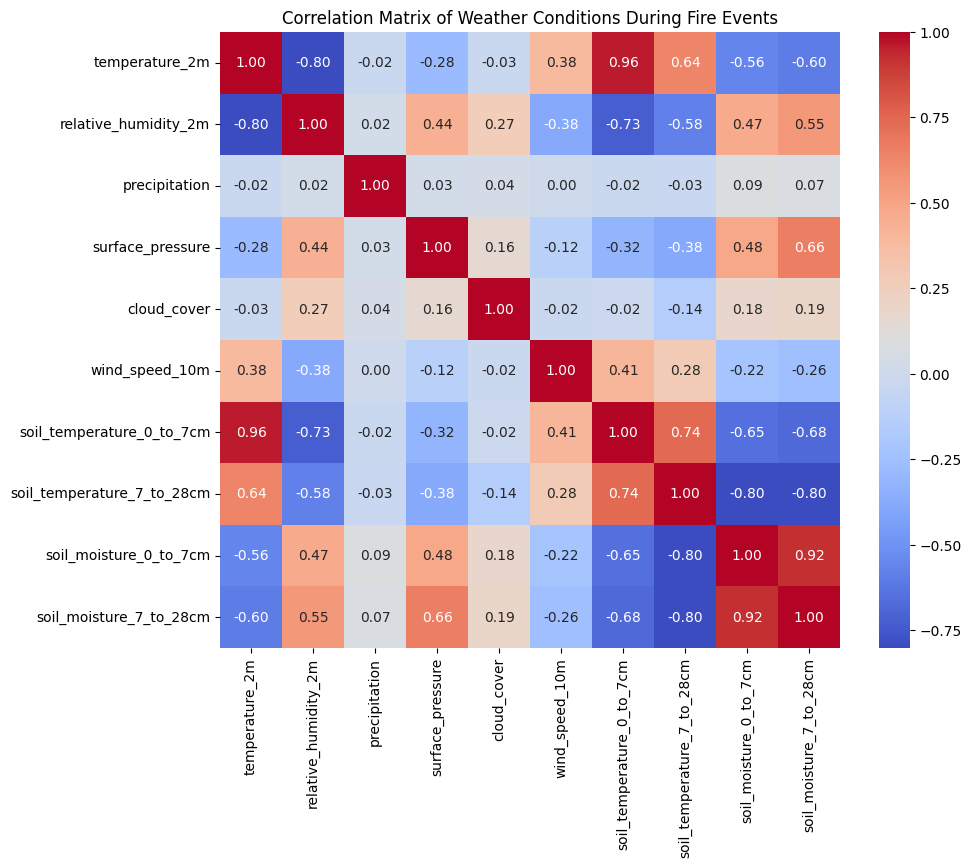

In [50]:
# Weather conditions when fires happened
correlation_data = fire_weather_data[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'surface_pressure', 
                                      'cloud_cover', 'wind_speed_10m', 'soil_temperature_0_to_7cm', 
                                      'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm']]


corr_matrix = correlation_data.corr()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Weather Conditions During Fire Events')
plt.show()
